In [3]:
#************************* MAIN SCRIPT **********************************
import sys
import math
import h5py
import matplotlib.pyplot as plt
import os
import math
from scipy import integrate
import numpy as np
import csv
#os.path.append('/Users/ajc/Core/Projects/ATS-Data/OR-CONDO/PyScript')
#import readdata

import datetime as DT
import matplotlib.dates as mdates
import matplotlib
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 12}
matplotlib.rc('font', **font)

In [4]:
#%run MyOtherNotebook.ipynb

In [65]:
Temp = np.linspace(278.15,263.15,50)
Pres = np.linspace(101125,141325,50)
depth = np.linspace(5.,-40,50)

In [66]:
def f_d(depth):
    x = 1 if depth < 1.0 else np.exp(-(depth-1)/2.)
    return x

In [67]:
def f_T(temp):
    Q_10 = 2.0
    t = (temp - 293.15)/10.
    x = Q_10**(t)
    return x

In [68]:
def f_m(temp, pres):
    p_min = -1.0e7
    p_max = -1.0e4
    p_atm = 101325.
    #pn_star = 3.34 * 1.e8 * (temp - 273.15)/273.15 if temp < 273.15 else pres - p_atm
    if (temp >= 273.15):
        pn_star = pres - p_atm
    else:
        pn_star = 0
    pn = min(0., max(pn_star, p_min))
    x = 0
    
    if pn >= p_max:
        x = pn/p_max
    else:
        x = np.log(p_min/pn) / np.log(p_min/p_max)
    return x

In [72]:
def carbon_rate(Temp_, Pres_, depth_):
    integ = 0
    C = []
    for i in range(len(Temp_)):
        if (Temp_[i] >= 273.15):
            dz = depth_[i] - depth_[i+1]
            dep = depth_[0] -  depth_[i]
            x = f_T(Temp_[i]) * f_d(dep) * f_m(Temp_[i], Pres_[i])
            #integ = integ + 
            C.append(x * dz)
        else:
            C.append(0)
    return C

In [73]:
C1 = carbon_rate(Temp_=Temp, Pres_=Pres, depth_=depth)

Text(0, 0.5, 'Decomposition rate')

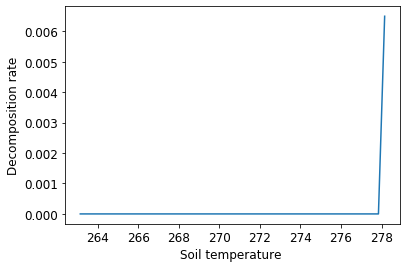

In [74]:
plt.plot(Temp,C1)
plt.xlabel('Soil temperature ')
plt.ylabel('Decomposition rate')